# Running a Preprocessing Pipeline

In this notebook we will load a slide, set up a preprocessing pipeline, and run the pipeline.

In [2]:
import matplotlib.pyplot as plt

from pathml.core.slide_classes import HESlide

## Load the slide

In [4]:
wsi = HESlide("../data/CMU-1.svs", name = "example")

In [5]:
# How big is the slide at different levels (resolutions)?
for i in range(3):
    print(f"level {i}:\t{wsi.slide.get_image_shape(level = i)}")

level 0:	(32914, 46000)
level 1:	(8228, 11500)
level 2:	(2057, 2875)


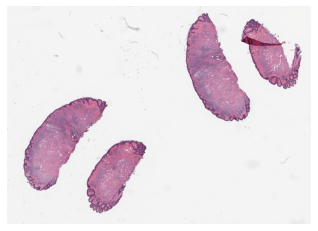

In [6]:
# See a thumbnail of the slide
thumbnail = wsi.slide.get_thumbnail(size = (500, 500))

plt.imshow(thumbnail)
plt.axis("off")
plt.show()

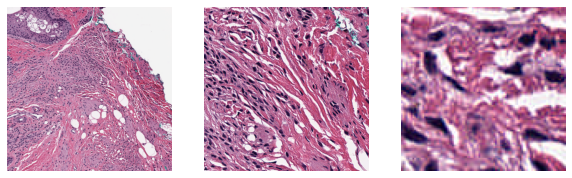

In [7]:
# Look at some specific regions
region0 = wsi.slide.extract_region(location = (32000, 8000), size = (2000, 2000))
region1 = wsi.slide.extract_region(location = (33000, 8500), size = (500, 500))
region2 = wsi.slide.extract_region(location = (33000, 8500), size = (100, 100))

fix, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 8))

ax[0].imshow(region0)
ax[1].imshow(region1)
ax[2].imshow(region2)

for a in ax: a.axis("off")
plt.show()

## Define the pipeline

First, let's define a simple preprocessing pipeline:

In [8]:
from pathml.preprocessing.pipeline import Pipeline
from pathml.preprocessing.transforms import BoxBlur, TissueDetectionHE

pipeline = Pipeline([
    BoxBlur(kernel_size=15),
    TissueDetectionHE(mask_name = "tissue", min_region_size=500, 
                      threshold=30, outer_contours_only=True)
])

## Run the pipeline

In [9]:
wsi.run(pipeline)

## Look at the results

Let's take a look at some of the tiles, and the masks (i.e. regions of detected tissue):

In [10]:
print(f"Total number of tiles extracted: {len(wsi.tiles)}")

Total number of tiles extracted: 150


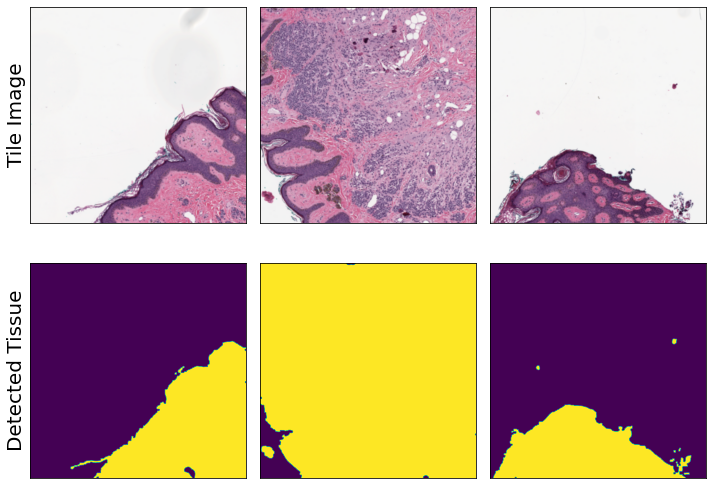

In [15]:
fix, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 7.5))

for c, tile_index in enumerate([60, 75, 100]):
    t = wsi.tiles[tile_index]
    ax[0, c].imshow(t.image)
    ax[1, c].imshow(t.masks["tissue"])

ax[0, 0].set_ylabel("Tile Image", fontsize = 20)
ax[1, 0].set_ylabel("Detected Tissue", fontsize = 20)
for a in ax.ravel(): 
    a.set_xticks([]); a.set_yticks([])
plt.tight_layout()
plt.show()

## Save preprocessed tiles

Now we can save the processed tiles to disk

In [12]:
wsi.tiles.write(out_dir = ".", filename = "mytiles.h5")